In [15]:
PATH_ = "C:\\Users\\ICN_admin\\Dropbox (Brain Modulation Lab)\\Shared Lab Folders\\CRCNS\\MOVEMENT DATA\\derivatives\\Int_old_grid\\"

In [16]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn import linear_model, metrics
from sklearn.model_selection import cross_val_score
import os 
from matplotlib import pyplot as plt
import pickle
import seaborn as sb
import pandas as pd
import numpy as np
from scipy import stats
import sys
sys.path.append('C:\\Users\\ICN_admin\\Documents\\icn\\icn_stats\\')
import icn_permutation_test

In [3]:
def append_time_dim(arr, y_, time_stamps):
    """
    apply added time dimension for the data array and label given time_stamps (with downsample_rate=100) in 100ms / need to check with 1375Hz
    """
    time_arr = np.zeros([arr.shape[0]-time_stamps, int(time_stamps*arr.shape[1])])
    for time_idx, time_ in enumerate(np.arange(time_stamps, arr.shape[0])):
        for time_point in range(time_stamps):
            time_arr[time_idx, time_point*arr.shape[1]:(time_point+1)*arr.shape[1]] = arr[time_-time_point,:]
    return time_arr, y_[time_stamps:]

In [4]:
def evalerror(preds, dtrain):
        """
        Custom defined r^2 evaluation function
        """
        labels = dtrain.get_label()
        # return a pair metric_name, result. The metric name must not contain a
        # colon (:) or a space since preds are margin(before logistic
        # transformation, cutoff at 0)

        r2 = metrics.r2_score(labels, preds)

        if r2 < 0:
            r2 = 0

        return 'r2', r2

In [5]:
model = xgb.XGBRegressor()
df = pd.DataFrame()
for f in range(len(os.listdir(PATH_))):
    sub_ = os.listdir(PATH_)[f][4:7]
    if sub_ not in ['000', '001', '004', '005', '006', '007', '008', '009', '010', '013', '014']:
        continue
    print(sub_)
    with open(PATH_+ '\\'+ os.listdir(PATH_)[f], 'rb') as handle:
        run_ = pickle.load(handle)
        print(run_["ch_names"])
        if len([ch for ch in run_["ch_names"] if "STN" in ch]) == 0:
            continue
        print("PROCESS")
        for ch_idx, ch_ in enumerate([ch for ch in run_["ch_names"] if "MOV" not in ch]):
            if "ECOG" in ch_:
                loc = "ECOG"
            else:
                loc = "STN"
            for label_idx, label in enumerate(run_["label_baseline_corrected"]):
                if run_["label_con_true"][label_idx] is True:
                    lat = "CON"
                else:
                    lat = "IPS"
                X, y = append_time_dim(run_["rf_data_median"][:,ch_idx,:], label, time_stamps=5)
                #res_ = np.mean(cross_val_score(model, X, y, cv=3, scoring="r2", n_jobs=59))
                res_ = xgb.cv(xgb.XGBRegressor().get_params(), dtrain=xgb.DMatrix(X, label=y), 
                              feval=evalerror, nfold=3).iloc[-1]["test-r2-mean"]
                print(res_)
                if "LEFT" in ch_:
                    hem = "LEFT"
                else:
                    hem = "RIGHT"
                df = df.append({
                    "r2": res_,
                    "ch_": ch_,
                    "sub": sub_,
                    "loc": loc,
                    "lat": lat,
                    "hem" : hem
                }, ignore_index=True)
            

000
['ECOG_RIGHT_0', 'ECOG_RIGHT_1', 'ECOG_RIGHT_2', 'ECOG_RIGHT_3', 'ECOG_RIGHT_4', 'ECOG_RIGHT_5', 'MOV_RIGHT', 'MOV_LEFT']
000
['ECOG_RIGHT_0', 'ECOG_RIGHT_1', 'ECOG_RIGHT_2', 'ECOG_RIGHT_3', 'ECOG_RIGHT_4', 'ECOG_RIGHT_5', 'MOV_RIGHT', 'MOV_LEFT']
000
['ECOG_RIGHT_0', 'ECOG_RIGHT_1', 'ECOG_RIGHT_2', 'ECOG_RIGHT_3', 'ECOG_RIGHT_4', 'ECOG_RIGHT_5', 'MOV_RIGHT', 'MOV_LEFT']
000
['STN_RIGHT_0', 'STN_RIGHT_1', 'STN_RIGHT_2', 'ECOG_RIGHT_0', 'ECOG_RIGHT_1', 'ECOG_RIGHT_2', 'ECOG_RIGHT_3', 'ECOG_RIGHT_4', 'ECOG_RIGHT_5', 'MOV_RIGHT', 'MOV_LEFT']
PROCESS
0.11595366666666666
0.48392166666666664
0.26078433333333334
0.7069046666666666
0.109456
0.6573343333333334
0.569083
0.8115943333333334
0.6356233333333333
0.762305
0.5167943333333334
0.7249326666666667
0.5038503333333333
0.7630386666666666
0.40265100000000004
0.6985793333333333
0.362953
0.628656
001
['ECOG_LEFT_0', 'ECOG_LEFT_1', 'ECOG_LEFT_2', 'ECOG_LEFT_3', 'ECOG_LEFT_4', 'ECOG_LEFT_5', 'ECOG_LEFT_6', 'ECOG_LEFT_7', 'ECOG_LEFT_8', 'ECOG_L

005
['ECOG_LEFT_0', 'ECOG_LEFT_1', 'ECOG_LEFT_2', 'ECOG_LEFT_3', 'ECOG_LEFT_4', 'ECOG_LEFT_5', 'ECOG_LEFT_6', 'ECOG_LEFT_7', 'MOV_RIGHT', 'MOV_LEFT']
005
['STN_LEFT_0', 'STN_LEFT_1', 'STN_LEFT_2', 'ECOG_LEFT_0', 'ECOG_LEFT_1', 'ECOG_LEFT_2', 'ECOG_LEFT_3', 'ECOG_LEFT_4', 'ECOG_LEFT_5', 'ECOG_LEFT_6', 'ECOG_LEFT_7', 'MOV_RIGHT', 'MOV_LEFT']
PROCESS
0.10046866666666666
0.03865633333333333
0.127557
0.08281433333333334
0.06384966666666667
0.011068333333333333
0.07598066666666667
0.018694333333333334
0.08664733333333334
0.011524
0.024367
0.051825333333333334
0.078894
0.06070433333333334
0.12186366666666666
0.07880133333333333
0.3384236666666667
0.17538166666666669
0.19978166666666666
0.177543
0.012251
0.05119666666666667
005
['ECOG_LEFT_0', 'ECOG_LEFT_1', 'ECOG_LEFT_2', 'ECOG_LEFT_3', 'ECOG_LEFT_4', 'ECOG_LEFT_5', 'ECOG_LEFT_6', 'ECOG_LEFT_7', 'MOV_RIGHT', 'MOV_LEFT']
005
['ECOG_LEFT_0', 'ECOG_LEFT_1', 'ECOG_LEFT_2', 'ECOG_LEFT_3', 'ECOG_LEFT_4', 'ECOG_LEFT_5', 'ECOG_LEFT_6', 'ECOG_LEFT_7',

0.0012066666666666667
0.00013333333333333334
0.013516
0.09862466666666665
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.001123
0.0
0.0
0.0
0.008828
0.029474333333333335
0.0
0.0
0.016864333333333332
0.2427156666666667
0.007475666666666668
0.2809903333333333
0.03096133333333333
0.19051833333333335
0.028674666666666668
0.11078066666666668
0.044145666666666666
0.11438766666666667
0.016904000000000002
0.18278800000000003
0.037348
0.169199
0.020486666666666667
0.07220466666666667
0.042183
0.054090666666666676
0.031147333333333332
0.05273466666666667
0.021024333333333336
0.07663366666666667
0.00908
0.16146133333333335
0.029645333333333333
0.11477866666666668
0.022666000000000002
0.07527466666666666
0.019135333333333334
0.13947966666666667
0.056615
0.12259966666666666
0.0
0.08850233333333334
0.0
0.28753933333333337
0.031987999999999996
0.5613816666666667
0.051062
0.4784743333333334
0.03399533333333333
0.25740033333333334
0.03727233333333333
0.13328333333333334
0.019049333333333335
0.07513033333333

In [9]:
df_best = pd.DataFrame()
for sub in ['000', '001', '004', '005', '006', '007', '008', '009', '010', '013', '014']:
    for lat in ["CON", "IPS"]:
        for loc in ["ECOG", "STN"]:
            for hem in ["RIGHT", "LEFT"]:
                df_extr = df[(df["sub"] == sub) & (df["lat"] == lat) & (df["loc"] == loc)]
                df_extr_cpy = df_extr.copy()
                for index, row in df_extr_cpy.iterrows():
                    if hem not in row["ch_"]:
                        df_extr = df_extr.drop(index)
                if df_extr.shape[0] != 0:
                    df_best = df_best.append(df_extr.loc[df_extr["r2"].argmax()], ignore_index=True)


C:\Users\ICN_admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  if sys.path[0] == '':


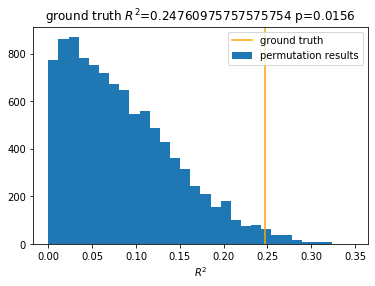

(0.24760975757575754, 0.0156)

In [21]:
icn_permutation_test.permutationTest(df_best[(df_best["lat"]=="CON") & (df_best["loc"] == "ECOG")]["r2"],
                                    df_best[(df_best["lat"]=="CON") & (df_best["loc"] == "STN")]["r2"], True,
                                    r"$R^2$", 10000)

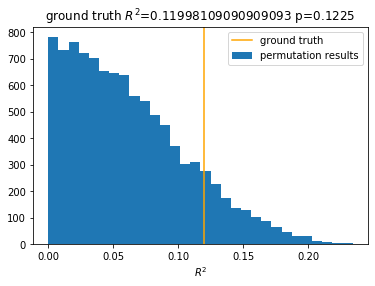

(0.11998109090909093, 0.1225)

In [22]:
icn_permutation_test.permutationTest(df_best[(df_best["lat"]=="IPS") & (df_best["loc"] == "ECOG")]["r2"],
                                    df_best[(df_best["lat"]=="IPS") & (df_best["loc"] == "STN")]["r2"], True,
                                    r"$R^2$", 10000)

In [10]:
df_best.to_pickle("XGB_best_ECOGSTN_samesize.p")

In [6]:
df.to_pickle("XGB_all_ECOGSTN_samesize.p")

In [117]:
df_best = pd.read_pickle("XGB_best_ECOGSTN_samesize.p")

In [118]:
s_ECOG_CON = str(np.round(df_best[(df_best["lat"] == "CON") & (df_best["loc"] == "ECOG")]["r2"].mean(), 2))+\
                 r"$\pm$"+str(np.round(df_best[(df_best["lat"] == "CON") & (df_best["loc"] == "ECOG")]["r2"].std(),2))
s_ECOG_IPS = str(np.round(df_best[(df_best["lat"] == "IPS") & (df_best["loc"] == "ECOG")]["r2"].mean(), 2))+\
                 r"$\pm$"+str(np.round(df_best[(df_best["lat"] == "IPS") & (df_best["loc"] == "ECOG")]["r2"].std(),2))
s_STN_CON = str(np.round(df_best[(df_best["lat"] == "CON") & (df_best["loc"] == "STN")]["r2"].mean(), 2))+\
                 r"$\pm$"+str(np.round(df_best[(df_best["lat"] == "CON") & (df_best["loc"] == "STN")]["r2"].std(),2))
s_STN_IPS = str(np.round(df_best[(df_best["lat"] == "IPS") & (df["loc"] == "STN")]["r2"].mean(), 2))+\
                 r"$\pm$"+str(np.round(df_best[(df_best["lat"] == "IPS") & (df_best["loc"] == "STN")]["r2"].std(),2)) 


C:\Users\ICN_admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


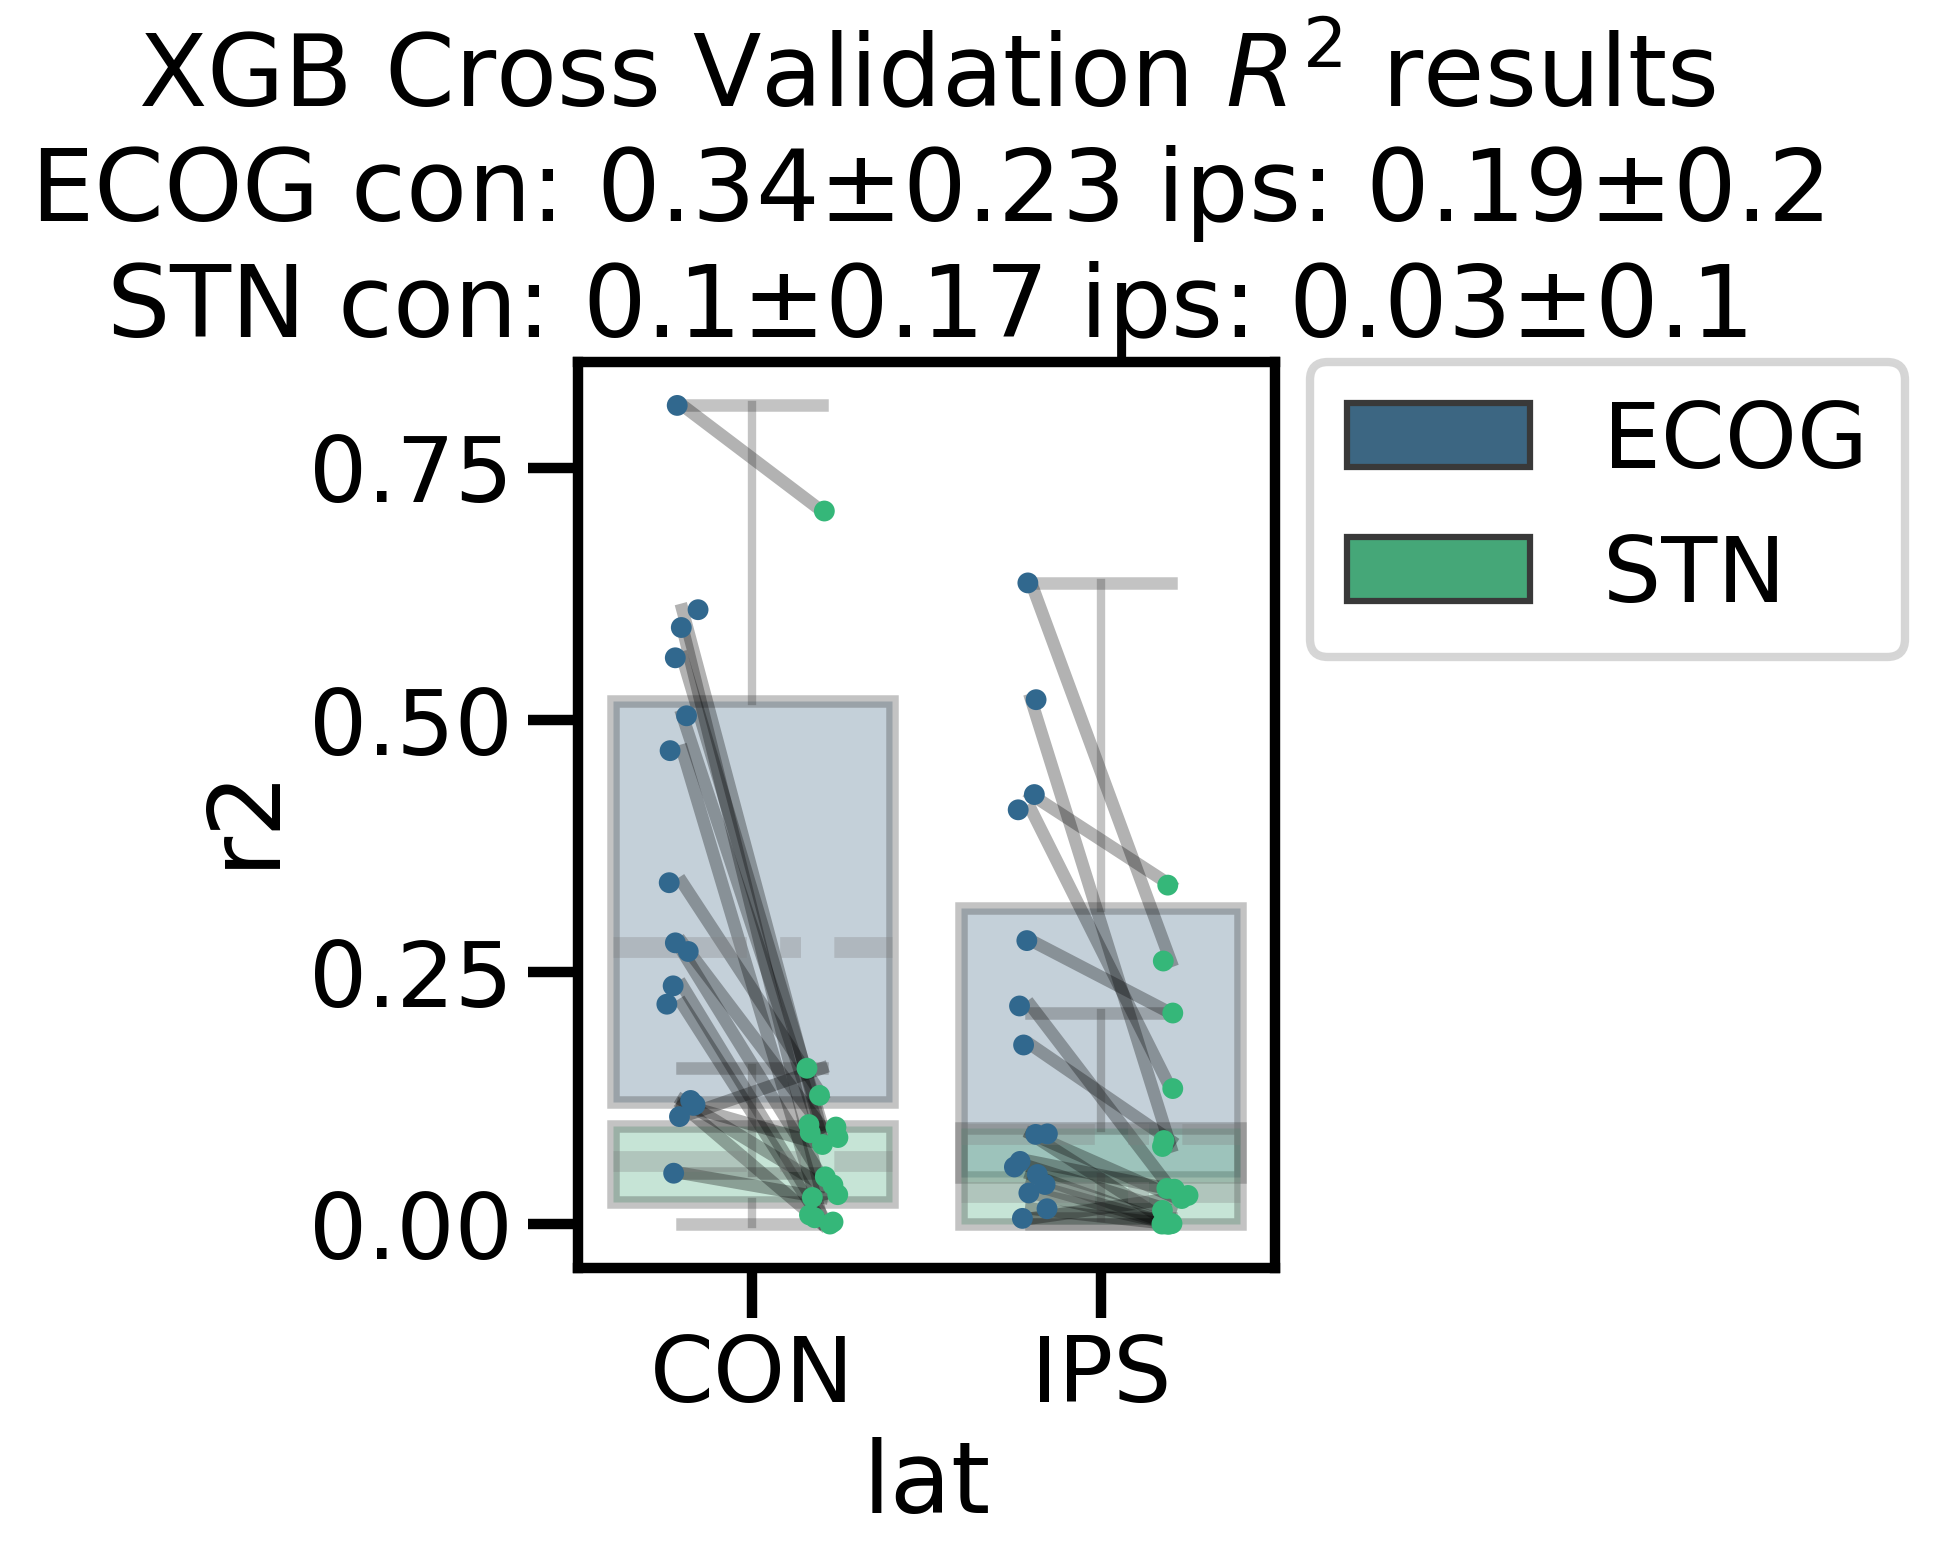

In [127]:
alpha_box = 0.3
plt.figure(figsize=(3,4), dpi=300)
sb.boxplot(x="lat", y="r2", hue="loc", order=["CON", "IPS"], hue_order=["ECOG", "STN"], data=df_best,
           palette="viridis", 
           showmeans=False, boxprops=dict(alpha=alpha_box), showcaps=True, showbox=True, 
           showfliers=False, notch=False, dodge=False,
           whiskerprops={'linewidth':2, "zorder":10, "alpha":alpha_box},
           capprops={"alpha":alpha_box},
           medianprops=dict(linestyle='-.', linewidth=5, color="gray", alpha=alpha_box))

    
ax = sb.stripplot(x="lat", y="r2", hue="loc", order=["CON", "IPS"], hue_order=["ECOG", "STN"],
             data=df_best, palette="viridis", dodge=True, s=5)
#plt.xticks(rotation=90)

# When creating the legend, only use the first two elements
# to effectively remove the last two.
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("XGB Cross Validation "+r"$R^2$"+" results\n"+
          "ECOG con: "+s_ECOG_CON+ " ips: "+s_ECOG_IPS+\
         "\nSTN con: "+s_STN_CON+ " ips: "+s_STN_IPS)
plt.plot([-0.2,0.2],np.array([df_best[(df_best["loc"]=="ECOG") & (df_best["lat"]=="CON")]["r2"], 
                              df_best[(df_best["loc"]=="STN") & (df_best["lat"]=="CON")]["r2"]]), color='black', alpha=0.3)
plt.plot([0.8,1.2],np.array([df_best[(df_best["loc"]=="ECOG") & (df_best["lat"]=="IPS")]["r2"], 
                              df_best[(df_best["loc"]=="STN") & (df_best["lat"]=="IPS")]["r2"]]), color='black', alpha=0.3)

In [8]:
# COMBINATION ECOG, STN and both
model = linear_model.LinearRegression()
df = pd.DataFrame()
time_stamps = 5

for ch_USED in ["ECOG", "STN","ECOG_STN"]:
    for f in range(len(os.listdir(PATH_))):
        sub_ = os.listdir(PATH_)[f][4:7]
        if sub_ not in ['000', '001', '004', '005', '006', '007', '008', '009', '010', '013', '014']:
            continue
        print(sub_)
        with open(PATH_+ '\\'+ os.listdir(PATH_)[f], 'rb') as handle:
            run_ = pickle.load(handle)
            print(run_["ch_names"])
            if len([ch for ch in run_["ch_names"] if "STN" in ch]) == 0:
                continue
            print("PROCESS")
            X_ = []
            start = True
            for ch_idx, ch_ in enumerate([ch for ch in run_["ch_names"] if "MOV" not in ch]):
                if ch_USED == "ECOG" and "ECOG" not in ch_:
                    continue
                if ch_USED == "STN" and "STN" not in ch_:
                    continue
                #ECOG_STN combines all 
                X, y = append_time_dim(run_["rf_data_median"][:,ch_idx,:], \
                                       run_["label_baseline_corrected"][0,:], \
                                       time_stamps=time_stamps)
                if start == True:
                    X_ = X
                    start = False
                else:
                    X_ = np.concatenate((X_, X), axis=1)

            for label_idx, label in enumerate(run_["label_baseline_corrected"]):
                res_ = xgb.cv(xgb.XGBRegressor().get_params(), dtrain=xgb.DMatrix(X_, label=label[time_stamps:]), 
                              feval=evalerror, nfold=3).iloc[-1]["test-r2-mean"]
                
                if res_ < 0:
                    res_ = 0
                if run_["label_con_true"][label_idx] is True:
                    lat = "CON"
                else:
                    lat = "IPS"
                df = df.append({
                    "r2": res_,
                    "ch_": ch_,
                    "sub": sub_,
                    "loc": ch_USED,
                    "lat": lat
                }, ignore_index=True)


000
['ECOG_RIGHT_0', 'ECOG_RIGHT_1', 'ECOG_RIGHT_2', 'ECOG_RIGHT_3', 'ECOG_RIGHT_4', 'ECOG_RIGHT_5', 'MOV_RIGHT', 'MOV_LEFT']
000
['ECOG_RIGHT_0', 'ECOG_RIGHT_1', 'ECOG_RIGHT_2', 'ECOG_RIGHT_3', 'ECOG_RIGHT_4', 'ECOG_RIGHT_5', 'MOV_RIGHT', 'MOV_LEFT']
000
['ECOG_RIGHT_0', 'ECOG_RIGHT_1', 'ECOG_RIGHT_2', 'ECOG_RIGHT_3', 'ECOG_RIGHT_4', 'ECOG_RIGHT_5', 'MOV_RIGHT', 'MOV_LEFT']
000
['STN_RIGHT_0', 'STN_RIGHT_1', 'STN_RIGHT_2', 'ECOG_RIGHT_0', 'ECOG_RIGHT_1', 'ECOG_RIGHT_2', 'ECOG_RIGHT_3', 'ECOG_RIGHT_4', 'ECOG_RIGHT_5', 'MOV_RIGHT', 'MOV_LEFT']
PROCESS
001
['ECOG_LEFT_0', 'ECOG_LEFT_1', 'ECOG_LEFT_2', 'ECOG_LEFT_3', 'ECOG_LEFT_4', 'ECOG_LEFT_5', 'ECOG_LEFT_6', 'ECOG_LEFT_7', 'ECOG_LEFT_8', 'ECOG_LEFT_9', 'ECOG_LEFT_10', 'ECOG_LEFT_11', 'ECOG_LEFT_12', 'ECOG_LEFT_13', 'ECOG_LEFT_14', 'ECOG_LEFT_15', 'ECOG_LEFT_16', 'ECOG_LEFT_17', 'ECOG_LEFT_18', 'ECOG_LEFT_19', 'ECOG_LEFT_20', 'ECOG_LEFT_21', 'ECOG_LEFT_22', 'ECOG_LEFT_23', 'ECOG_LEFT_24', 'ECOG_LEFT_25', 'ECOG_LEFT_26', 'ECOG_LEFT_27', 

['ECOG_RIGHT_0', 'ECOG_RIGHT_1', 'ECOG_RIGHT_2', 'ECOG_RIGHT_3', 'ECOG_RIGHT_4', 'ECOG_RIGHT_5', 'ECOG_RIGHT_6', 'ECOG_RIGHT_7', 'ECOG_RIGHT_8', 'ECOG_RIGHT_9', 'ECOG_RIGHT_10', 'ECOG_RIGHT_11', 'ECOG_RIGHT_12', 'ECOG_RIGHT_13', 'ECOG_RIGHT_14', 'ECOG_RIGHT_15', 'ECOG_RIGHT_16', 'ECOG_RIGHT_17', 'ECOG_RIGHT_18', 'ECOG_RIGHT_19', 'ECOG_RIGHT_20', 'ECOG_RIGHT_21', 'ECOG_RIGHT_22', 'ECOG_RIGHT_23', 'ECOG_RIGHT_24', 'ECOG_RIGHT_25', 'ECOG_RIGHT_26', 'ECOG_RIGHT_27', 'MOV_RIGHT', 'MOV_LEFT']
006
['STN_RIGHT_0', 'STN_RIGHT_1', 'STN_RIGHT_2', 'ECOG_RIGHT_0', 'ECOG_RIGHT_1', 'ECOG_RIGHT_2', 'ECOG_RIGHT_3', 'ECOG_RIGHT_4', 'ECOG_RIGHT_5', 'ECOG_RIGHT_6', 'ECOG_RIGHT_7', 'ECOG_RIGHT_8', 'ECOG_RIGHT_9', 'ECOG_RIGHT_10', 'ECOG_RIGHT_11', 'ECOG_RIGHT_12', 'ECOG_RIGHT_13', 'ECOG_RIGHT_14', 'ECOG_RIGHT_15', 'ECOG_RIGHT_16', 'ECOG_RIGHT_17', 'ECOG_RIGHT_18', 'ECOG_RIGHT_19', 'ECOG_RIGHT_20', 'ECOG_RIGHT_21', 'ECOG_RIGHT_22', 'ECOG_RIGHT_23', 'ECOG_RIGHT_24', 'ECOG_RIGHT_25', 'ECOG_RIGHT_26', 'ECOG_RIG

001
['ECOG_RIGHT_0', 'ECOG_RIGHT_1', 'ECOG_RIGHT_2', 'ECOG_RIGHT_3', 'ECOG_RIGHT_4', 'ECOG_RIGHT_5', 'ECOG_RIGHT_6', 'ECOG_RIGHT_7', 'ECOG_RIGHT_8', 'ECOG_RIGHT_9', 'ECOG_RIGHT_10', 'ECOG_RIGHT_11', 'ECOG_RIGHT_12', 'ECOG_RIGHT_13', 'ECOG_RIGHT_14', 'ECOG_RIGHT_15', 'ECOG_RIGHT_16', 'ECOG_RIGHT_17', 'ECOG_RIGHT_18', 'ECOG_RIGHT_19', 'ECOG_RIGHT_20', 'ECOG_RIGHT_21', 'ECOG_RIGHT_22', 'ECOG_RIGHT_23', 'ECOG_RIGHT_24', 'ECOG_RIGHT_25', 'ECOG_RIGHT_26', 'ECOG_RIGHT_27', 'MOV_RIGHT', 'MOV_LEFT']
001
['ECOG_RIGHT_0', 'ECOG_RIGHT_1', 'ECOG_RIGHT_2', 'ECOG_RIGHT_3', 'ECOG_RIGHT_4', 'ECOG_RIGHT_5', 'ECOG_RIGHT_6', 'ECOG_RIGHT_7', 'ECOG_RIGHT_8', 'ECOG_RIGHT_9', 'ECOG_RIGHT_10', 'ECOG_RIGHT_11', 'ECOG_RIGHT_12', 'ECOG_RIGHT_13', 'ECOG_RIGHT_14', 'ECOG_RIGHT_15', 'ECOG_RIGHT_16', 'ECOG_RIGHT_17', 'ECOG_RIGHT_18', 'ECOG_RIGHT_19', 'ECOG_RIGHT_20', 'ECOG_RIGHT_21', 'ECOG_RIGHT_22', 'ECOG_RIGHT_23', 'ECOG_RIGHT_24', 'ECOG_RIGHT_25', 'ECOG_RIGHT_26', 'ECOG_RIGHT_27', 'MOV_RIGHT', 'MOV_LEFT']
004
['ST

['ECOG_RIGHT_0', 'ECOG_RIGHT_1', 'ECOG_RIGHT_2', 'ECOG_RIGHT_3', 'ECOG_RIGHT_4', 'ECOG_RIGHT_5', 'MOV_RIGHT', 'MOV_LEFT']
010
['STN_RIGHT_0', 'STN_RIGHT_1', 'STN_RIGHT_2', 'ECOG_RIGHT_0', 'ECOG_RIGHT_1', 'ECOG_RIGHT_2', 'ECOG_RIGHT_3', 'ECOG_RIGHT_4', 'ECOG_RIGHT_5', 'MOV_RIGHT', 'MOV_LEFT']
PROCESS
013
['STN_LEFT_0', 'STN_LEFT_1', 'STN_LEFT_2', 'ECOG_LEFT_0', 'ECOG_LEFT_1', 'ECOG_LEFT_2', 'ECOG_LEFT_3', 'ECOG_LEFT_4', 'ECOG_LEFT_5', 'MOV_RIGHT', 'MOV_LEFT']
PROCESS
013
['ECOG_LEFT_0', 'ECOG_LEFT_1', 'ECOG_LEFT_2', 'ECOG_LEFT_3', 'ECOG_LEFT_4', 'ECOG_LEFT_5', 'MOV_RIGHT', 'MOV_LEFT']
014
['ECOG_RIGHT_0', 'ECOG_RIGHT_1', 'ECOG_RIGHT_2', 'ECOG_RIGHT_3', 'ECOG_RIGHT_4', 'ECOG_RIGHT_5', 'MOV_RIGHT', 'MOV_LEFT']
014
['ECOG_RIGHT_0', 'ECOG_RIGHT_1', 'ECOG_RIGHT_2', 'ECOG_RIGHT_3', 'ECOG_RIGHT_4', 'ECOG_RIGHT_5', 'MOV_RIGHT', 'MOV_LEFT']
014
['STN_RIGHT_0', 'STN_RIGHT_1', 'STN_RIGHT_2', 'ECOG_RIGHT_0', 'ECOG_RIGHT_1', 'ECOG_RIGHT_2', 'ECOG_RIGHT_3', 'ECOG_RIGHT_4', 'ECOG_RIGHT_5', 'MOV_RIGHT'

006
['STN_LEFT_0', 'STN_LEFT_1', 'STN_LEFT_2', 'ECOG_LEFT_0', 'ECOG_LEFT_1', 'ECOG_LEFT_2', 'ECOG_LEFT_3', 'ECOG_LEFT_4', 'ECOG_LEFT_5', 'ECOG_LEFT_6', 'ECOG_LEFT_7', 'ECOG_LEFT_8', 'ECOG_LEFT_9', 'ECOG_LEFT_10', 'ECOG_LEFT_11', 'ECOG_LEFT_12', 'ECOG_LEFT_13', 'ECOG_LEFT_14', 'ECOG_LEFT_15', 'ECOG_LEFT_16', 'ECOG_LEFT_17', 'ECOG_LEFT_18', 'ECOG_LEFT_19', 'ECOG_LEFT_20', 'ECOG_LEFT_21', 'ECOG_LEFT_22', 'ECOG_LEFT_23', 'ECOG_LEFT_24', 'ECOG_LEFT_25', 'ECOG_LEFT_26', 'ECOG_LEFT_27', 'ECOG_LEFT_28', 'ECOG_LEFT_29', 'ECOG_LEFT_30', 'ECOG_LEFT_31', 'ECOG_LEFT_32', 'ECOG_LEFT_33', 'ECOG_LEFT_34', 'ECOG_LEFT_35', 'MOV_RIGHT', 'MOV_LEFT']
PROCESS
006
['ECOG_RIGHT_0', 'ECOG_RIGHT_1', 'ECOG_RIGHT_2', 'ECOG_RIGHT_3', 'ECOG_RIGHT_4', 'ECOG_RIGHT_5', 'ECOG_RIGHT_6', 'ECOG_RIGHT_7', 'ECOG_RIGHT_8', 'ECOG_RIGHT_9', 'ECOG_RIGHT_10', 'ECOG_RIGHT_11', 'ECOG_RIGHT_12', 'ECOG_RIGHT_13', 'ECOG_RIGHT_14', 'ECOG_RIGHT_15', 'ECOG_RIGHT_16', 'ECOG_RIGHT_17', 'ECOG_RIGHT_18', 'ECOG_RIGHT_19', 'ECOG_RIGHT_20', 'E

In [10]:
df.to_pickle("XGB_all_ch_comb_ECOG_STN_ECOGSTN_samesize.p")

In [5]:
df = pd.read_pickle("XGB_all_ch_comb_ECOG_STN_ECOGSTN_samesize.p")

In [6]:
df_best = pd.read_pickle("XGB_best_ECOGSTN_samesize.p")

In [7]:
s_ECOG_CON = str(np.round(df[(df["lat"] == "CON") & (df["loc"] == "ECOG")]["r2"].mean(), 2))+\
                 r"$\pm$"+str(np.round(df[(df["lat"] == "CON") & (df["loc"] == "ECOG")]["r2"].std(),2))
s_ECOG_IPS = str(np.round(df[(df["lat"] == "IPS") & (df["loc"] == "ECOG")]["r2"].mean(), 2))+\
                 r"$\pm$"+str(np.round(df[(df["lat"] == "IPS") & (df["loc"] == "ECOG")]["r2"].std(),2))
s_STN_CON = str(np.round(df[(df["lat"] == "CON") & (df["loc"] == "STN")]["r2"].mean(), 2))+\
                 r"$\pm$"+str(np.round(df[(df["lat"] == "CON") & (df["loc"] == "STN")]["r2"].std(),2))
s_STN_IPS = str(np.round(df[(df["lat"] == "IPS") & (df["loc"] == "STN")]["r2"].mean(), 2))+\
                 r"$\pm$"+str(np.round(df[(df["lat"] == "IPS") & (df["loc"] == "STN")]["r2"].std(),2)) 
s_ECOGSTN_CON = str(np.round(df[(df["lat"] == "CON") & (df["loc"] == "ECOG_STN")]["r2"].mean(), 2))+\
                 r"$\pm$"+str(np.round(df[(df["lat"] == "CON") & (df["loc"] == "ECOG_STN")]["r2"].std(),2))
s_ECOGSTN_IPS = str(np.round(df[(df["lat"] == "IPS") & (df["loc"] == "ECOG_STN")]["r2"].mean(), 2))+\
                 r"$\pm$"+str(np.round(df[(df["lat"] == "IPS") & (df["loc"] == "ECOG_STN")]["r2"].std(),2))           

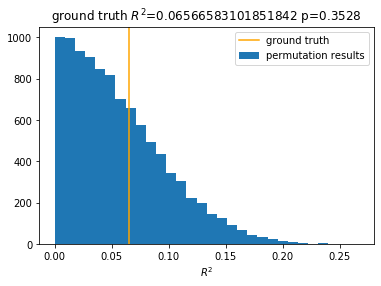

(0.06566583101851842, 0.3528)

In [21]:
icn_permutation_test.permutationTest(df_best[(df_best["lat"]=="CON") & (df_best["loc"] == "ECOG")]["r2"],
                                    df[(df["lat"]=="CON") & (df["loc"] == "ECOG")]["r2"], True,
                                    r"$R^2$", 10000)

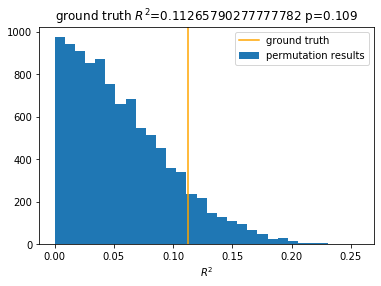

(0.11265790277777782, 0.109)

In [22]:
icn_permutation_test.permutationTest(df_best[(df_best["lat"]=="IPS") & (df_best["loc"] == "ECOG")]["r2"],
                                    df[(df["lat"]=="IPS") & (df["loc"] == "ECOG")]["r2"], True,
                                    r"$R^2$", 10000)

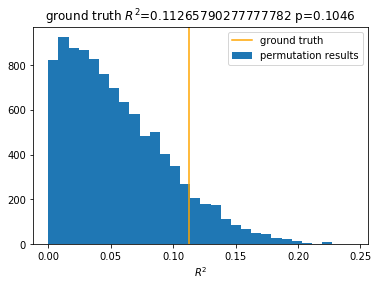

(0.11265790277777782, 0.1046)

In [23]:
icn_permutation_test.permutationTest(df_best[(df_best["lat"]=="IPS") & (df_best["loc"] == "ECOG")]["r2"],
                                    df[(df["lat"]=="IPS") & (df["loc"] == "ECOG_STN")]["r2"], True,
                                    r"$R^2$", 10000)

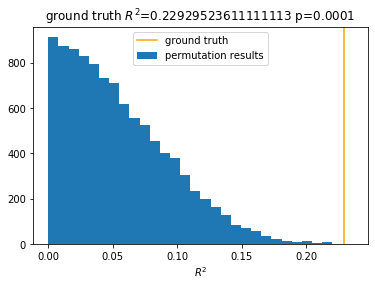

(0.22929523611111113, 0.0001)

In [24]:
icn_permutation_test.permutationTest(df_best[(df_best["lat"]=="IPS") & (df_best["loc"] == "STN")]["r2"],
                                    df[(df["lat"]=="IPS") & (df["loc"] == "STN")]["r2"], True,
                                    r"$R^2$", 10000)

In [100]:
df_best_ECOG_best_STN = pd.read_pickle("best_ECOG_best_STN_combined_XGB.p")

In [107]:
df_best_ECOG_best_STN[(df_best_ECOG_best_STN["sub"] == sub) &\
                      (df_best_ECOG_best_STN["lat"] == "CON") &\
                      (df_best_ECOG_best_STN["fbands"] == "all")]["r2"].iloc[0]

0.26039833333333334

In [111]:
for sub in df["sub"].unique():
    df = df.append({
        "loc" : "best ECOG + best STN",
        "r2" : df_best_ECOG_best_STN[(df_best_ECOG_best_STN["sub"] == sub) &\
                      (df_best_ECOG_best_STN["lat"] == "CON") &\
                      (df_best_ECOG_best_STN["fbands"] == "all")]["r2"].iloc[0], 
        "lat" : "CON", 
        "ch_" : 0, 
        "sub" : sub, 
        "UPDRS_total" : df[df["sub"] == sub]["UPDRS_total"].iloc[0]
    }, ignore_index=True)
    df = df.append({
        "loc" : "best ECOG + best STN",
        "r2" : df_best_ECOG_best_STN[(df_best_ECOG_best_STN["sub"] == sub) &\
                      (df_best_ECOG_best_STN["lat"] == "IPS") &\
                      (df_best_ECOG_best_STN["fbands"] == "all")]["r2"].iloc[0], 
        "lat" : "IPS", 
        "ch_" : 0, 
        "sub" : sub, 
        "UPDRS_total" : df[df["sub"] == sub]["UPDRS_total"].iloc[0]
    }, ignore_index=True)

In [115]:
s_bestECOGbestSTN_CON = str(np.round(df[(df["lat"] == "CON") & (df["loc"] == "best ECOG + best STN")]["r2"].mean(), 2))+\
                 r"$\pm$"+str(np.round(df[(df["lat"] == "CON") & (df["loc"] == "best ECOG + best STN")]["r2"].std(),2))
s_bestECOGbestSTN_IPS = str(np.round(df[(df["lat"] == "IPS") & (df["loc"] == "best ECOG + best STN")]["r2"].mean(), 2))+\
                 r"$\pm$"+str(np.round(df[(df["lat"] == "IPS") & (df["loc"] == "best ECOG + best STN")]["r2"].std(),2))           

Text(0.5, 0, 'laterality')

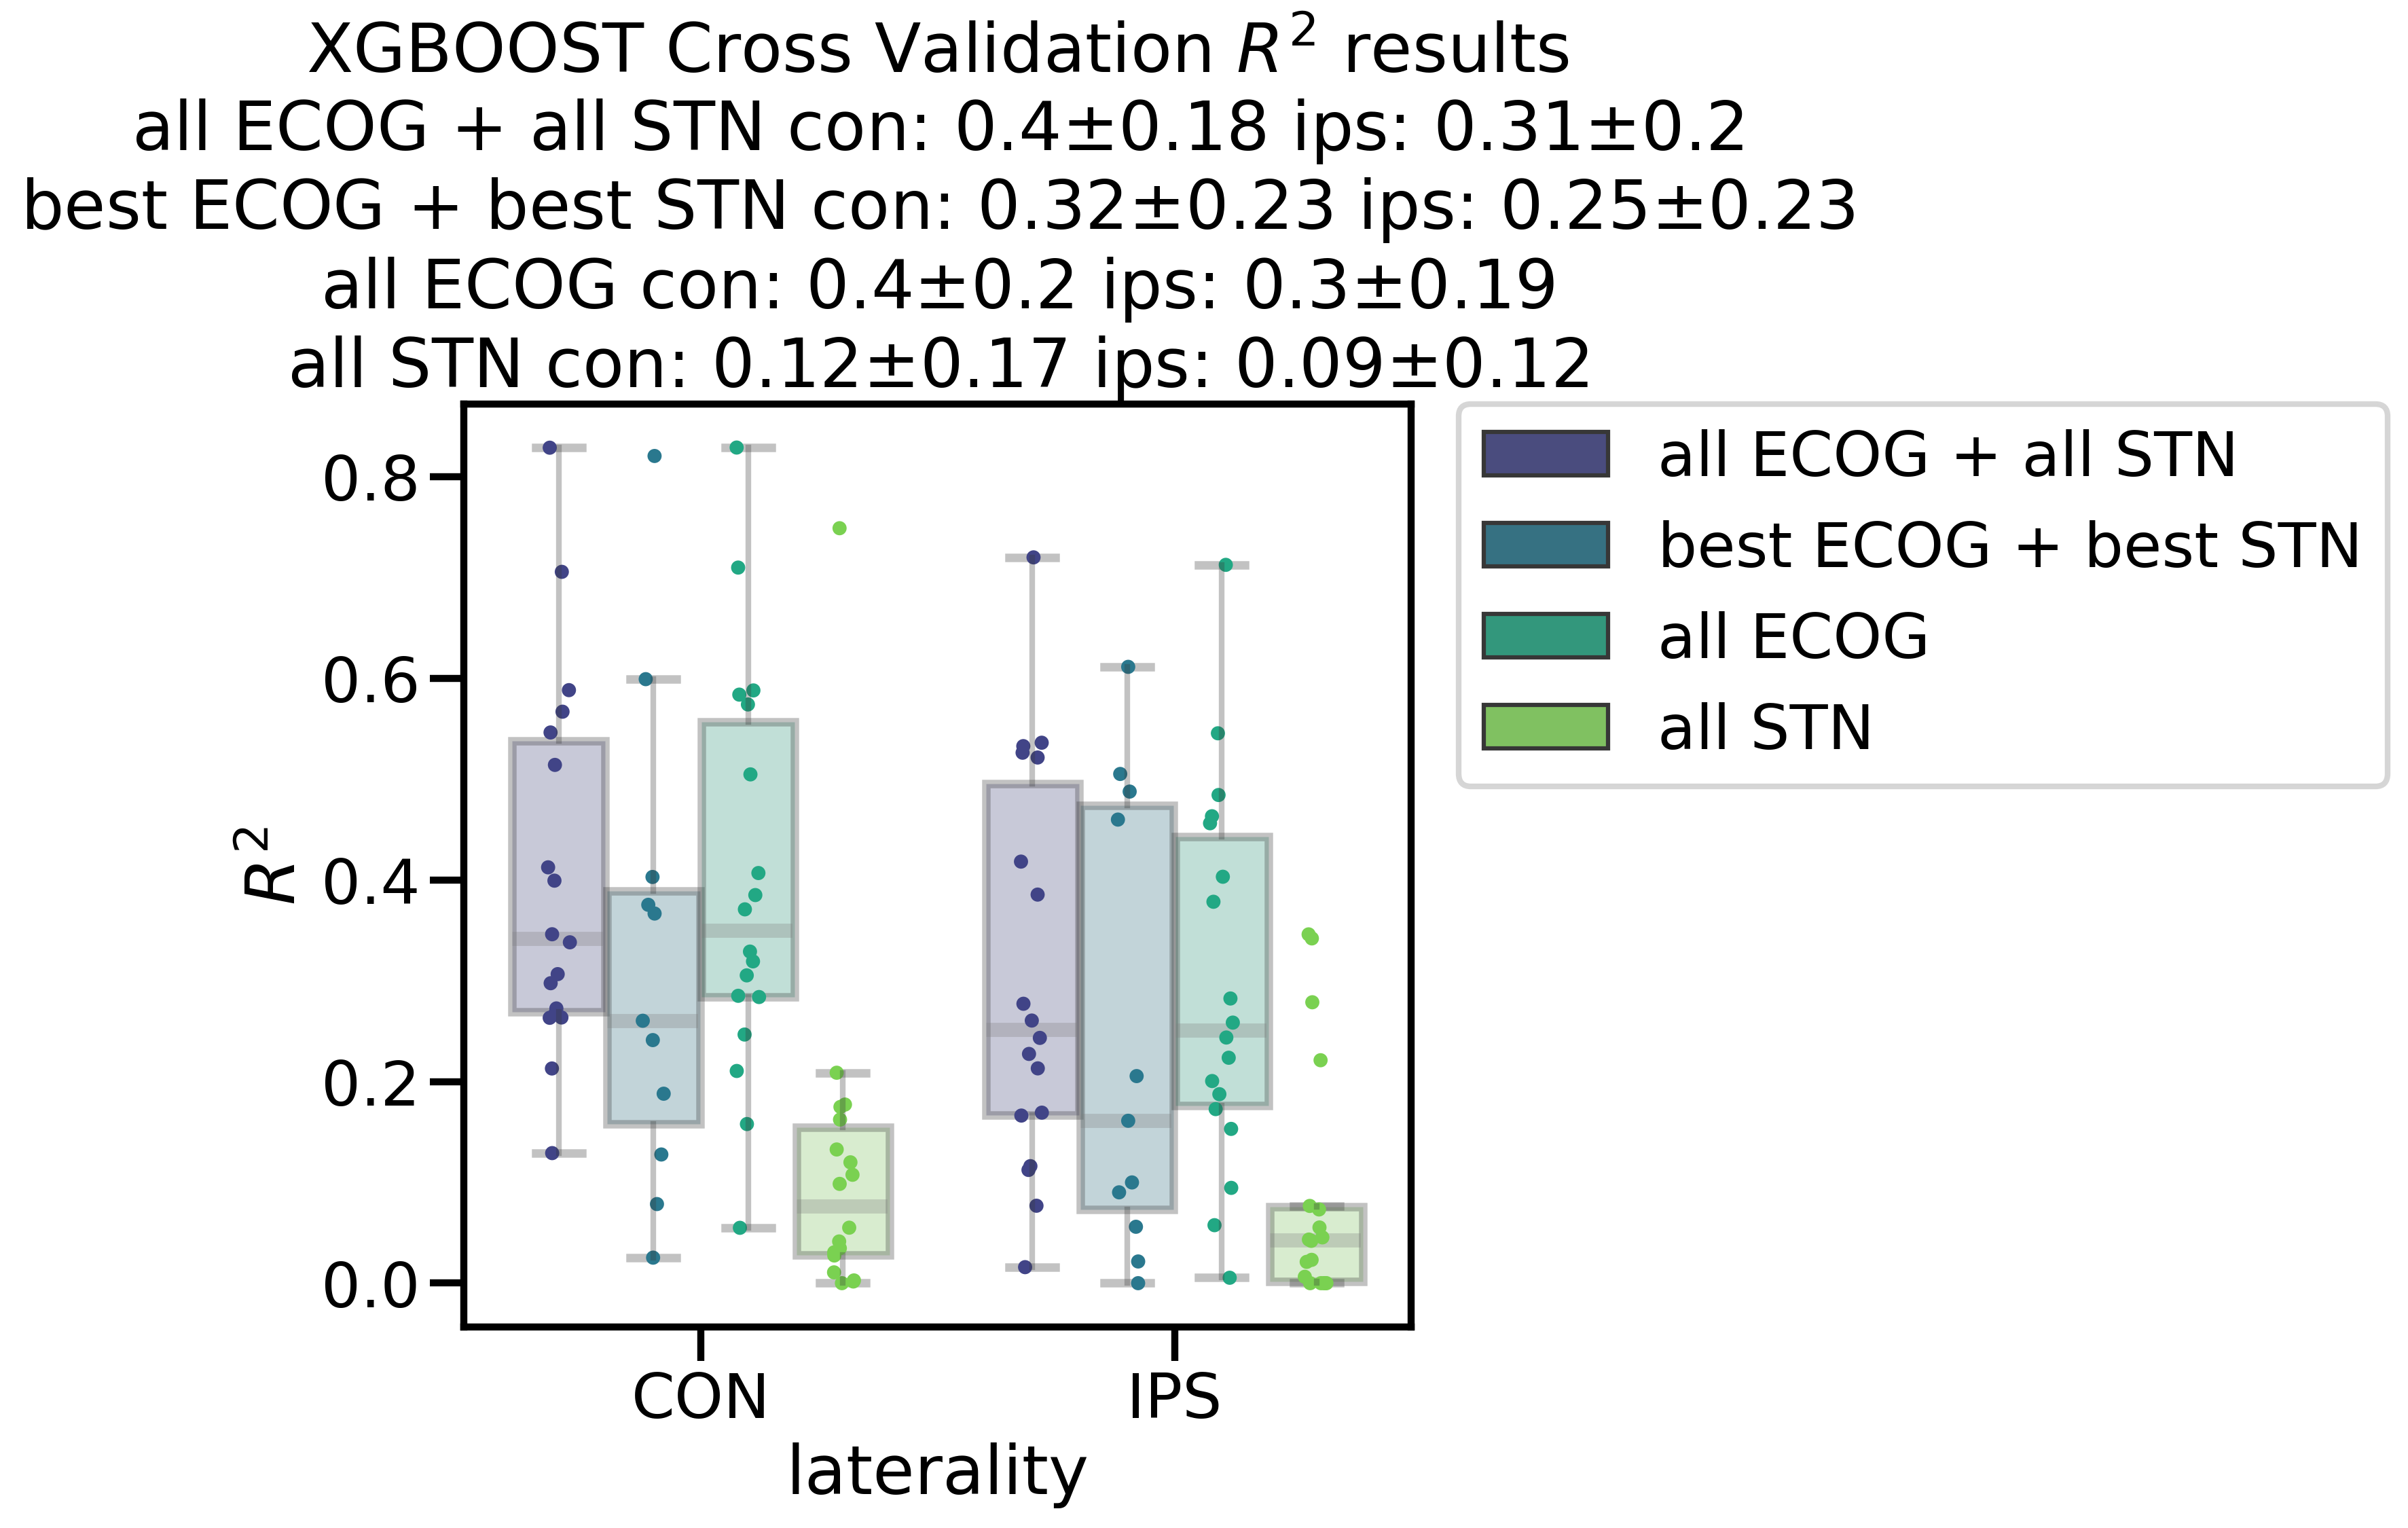

In [116]:
alpha_box = 0.3
plt.figure(figsize=(6,6), dpi=300)
sb.boxplot(x="lat", y="r2", hue="loc", order=["CON", "IPS"], hue_order=["ECOG_STN", "best ECOG + best STN", \
                                                                "ECOG", "STN"], data=df,
           palette="viridis", 
           showmeans=False, boxprops=dict(alpha=alpha_box), showcaps=True, showbox=True, 
           showfliers=False, notch=False,
           whiskerprops={'linewidth':2, "zorder":10, "alpha":alpha_box},
           capprops={"alpha":alpha_box},
           medianprops=dict(linestyle='-.', linewidth=5, color="gray", alpha=alpha_box))

    
ax = sb.stripplot(x="lat", y="r2", hue="loc", order=["CON", "IPS"], hue_order=["ECOG_STN", "best ECOG + best STN", \
                                                                               "ECOG", "STN"],
             data=df, palette="viridis", dodge=True, s=5)
#plt.xticks(rotation=90)

# When creating the legend, only use the first two elements
# to effectively remove the last two.
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:4], ['all ECOG + all STN', 'best ECOG + best STN', 'all ECOG', 'all STN'], \
               bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("XGBOOST Cross Validation "+r"$R^2$"+" results"+
          "\nall ECOG + all STN con: "+s_ECOGSTN_CON+ " ips: "+s_ECOGSTN_IPS+\
          "\nbest ECOG + best STN con: "+s_bestECOGbestSTN_CON+ " ips: "+s_bestECOGbestSTN_IPS+\
          "\nall ECOG con: "+s_ECOG_CON+ " ips: "+s_ECOG_IPS+\
          "\nall STN con: "+s_STN_CON+ " ips: "+s_STN_IPS)
         
plt.ylabel(r"$R^2$")
plt.xlabel("laterality")

Text(0.5, 1.0, 'XGB Cross Validation $R^2$ results\nECOG con: 0.4$\\pm$0.2 ips: 0.3$\\pm$0.19\nSTN con: 0.12$\\pm$0.17 ips: 0.09$\\pm$0.12\nECOG_STN con: 0.4$\\pm$0.18 ips: 0.31$\\pm$0.2')

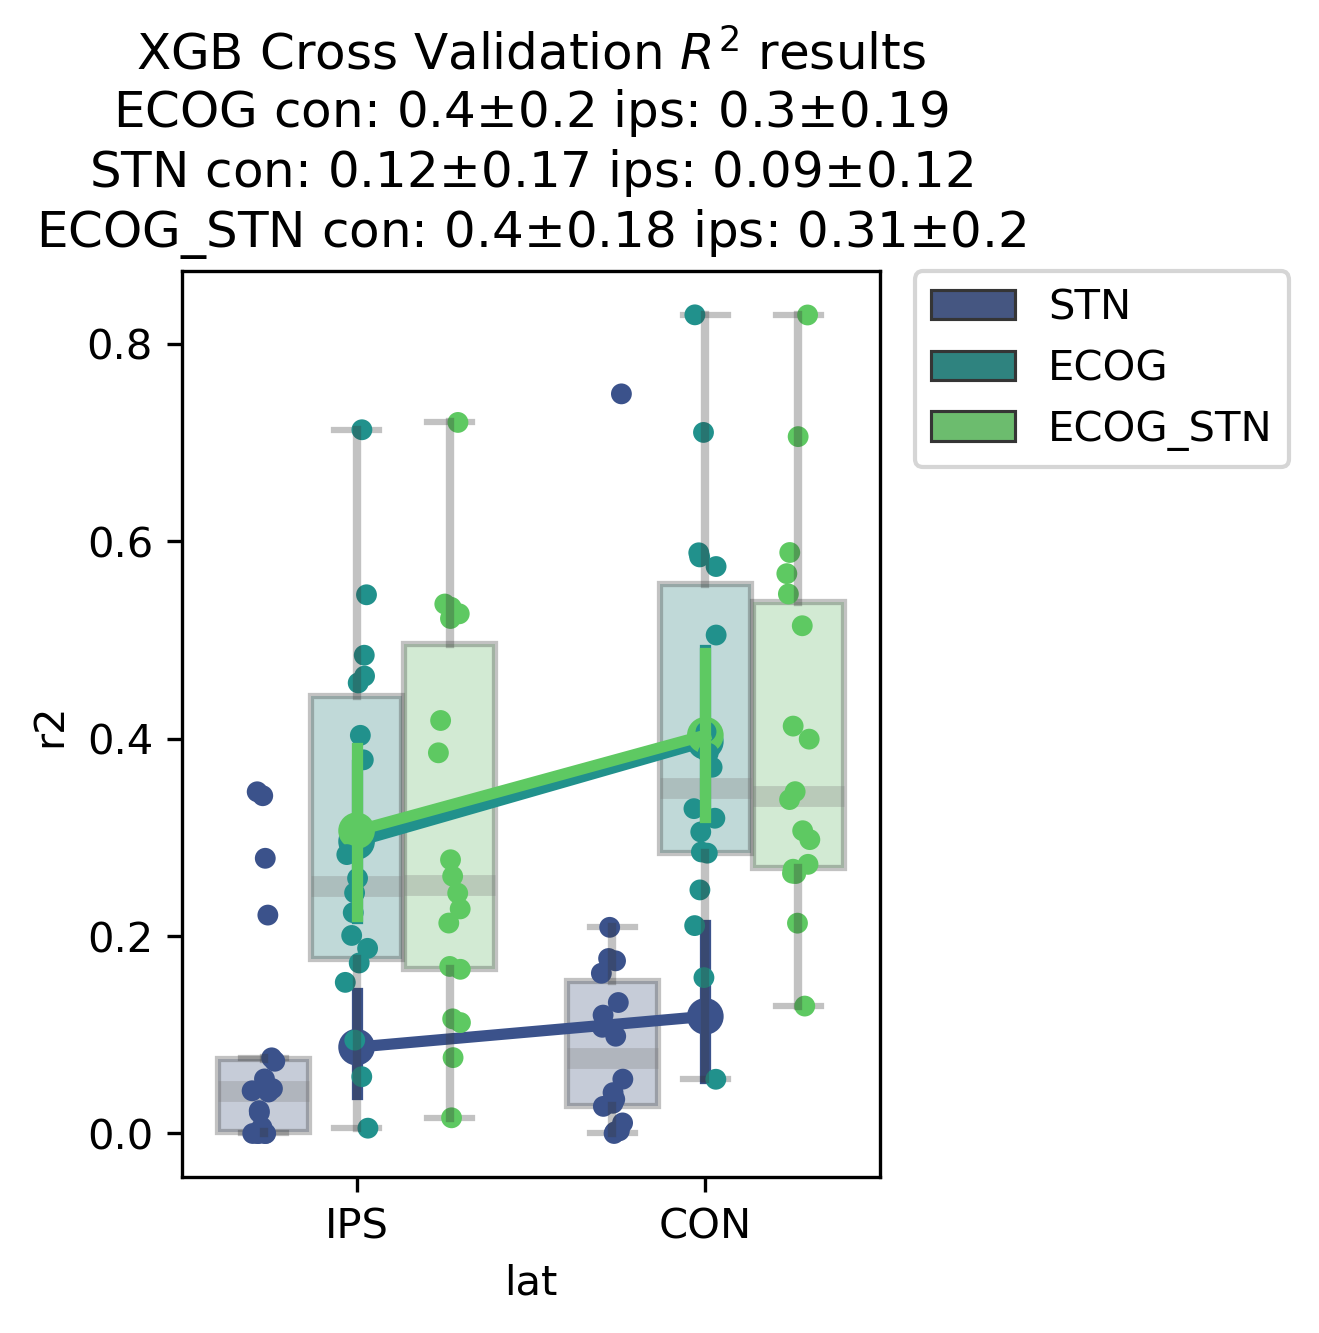

In [14]:
alpha_box = 0.3
plt.figure(figsize=(3,4), dpi=300)
sb.boxplot(x="lat", y="r2", hue="loc", order=["IPS", "CON"], hue_order=["STN", "ECOG", "ECOG_STN"], data=df,
           palette="viridis", 
           showmeans=False, boxprops=dict(alpha=alpha_box), showcaps=True, showbox=True, 
           showfliers=False, notch=False,
           whiskerprops={'linewidth':2, "zorder":10, "alpha":alpha_box},
           capprops={"alpha":alpha_box},
           medianprops=dict(linestyle='-.', linewidth=5, color="gray", alpha=alpha_box))

sb.pointplot(x="lat", y="r2", hue="loc", order=["IPS", "CON"], hue_order=["STN", "ECOG", "ECOG_STN"], data=df,
           palette="viridis", alpha=alpha_box)
    
ax = sb.stripplot(x="lat", y="r2", hue="loc", order=["IPS", "CON"], hue_order=["STN", "ECOG", "ECOG_STN"],
             data=df, palette="viridis", dodge=True, s=5)
#plt.xticks(rotation=90)

# When creating the legend, only use the first two elements
# to effectively remove the last two.
handles, labels = ax.get_legend_handles_labels()
l = plt.legend(handles[0:3], labels[0:3], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("XGB Cross Validation "+r"$R^2$"+" results\n"+
         "ECOG con: "+s_ECOG_CON+ " ips: "+s_ECOG_IPS+\
         "\nSTN con: "+s_STN_CON+ " ips: "+s_STN_IPS+\
         "\nECOG_STN con: "+s_ECOGSTN_CON+ " ips: "+s_ECOGSTN_IPS)


Text(0.5, 1.0, 'XGB Performance comparison for combined channels')

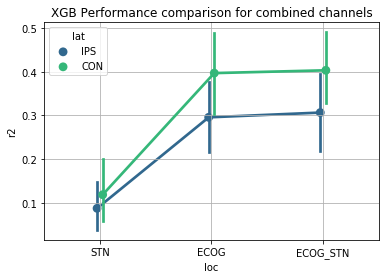

In [15]:
sb.pointplot(x ="loc", y="r2", hue="lat", hue_order=["IPS", "CON"], 
           order=["STN", "ECOG", "ECOG_STN"], data=df,
           palette="viridis", alpha=0.3, dodge=True)
plt.grid(True)
plt.title("XGB Performance comparison for combined channels")

#### Correlation Analysis with UPDRS total

In [15]:
import seaborn as sns
sys.path.append('C:\\Users\\ICN_admin\\Documents\\icn\\icn_stats\\')
import icn_permutation_test

In [24]:
df_all = pd.read_csv("..\\df_all.csv", index_col=0)

In [27]:
df_all

,ch,dist_con,dist_ips,loc,r2_con,r2_ips,sess_,sub,x,y,z,b_peak,UPDRS_rigidity_upper_extrimity_contralateral,UPDRS_rigidity_upper_extrimity_ipsilateral,UPDRS_combined_akinesia_rigidty_contalateral,UPDRS_combined_akinesia_rigidty_ipsilateral,UPDRS_total
0,ECOG_RIGHT_0,23.714756,23.714756,ECOG,0.658060,0.418974,right,0,37.318174,-48.610127,61.797655,3.004269,1,1,6.0,7,28
1,ECOG_RIGHT_1,12.718657,12.718657,ECOG,0.711734,0.415419,right,0,40.159894,-37.315930,64.311716,4.356077,1,1,6.0,7,28
2,ECOG_RIGHT_2,4.524949,4.524949,ECOG,0.549021,0.308202,right,0,40.943036,-27.217785,64.095184,3.654367,1,1,6.0,7,28
3,ECOG_RIGHT_3,8.466679,8.466679,ECOG,0.623977,0.375705,right,0,39.783955,-17.005231,63.866181,3.849308,1,1,6.0,7,28
4,ECOG_RIGHT_4,19.792789,19.792789,ECOG,0.571970,0.246979,right,0,39.688136,-5.528025,61.682543,2.562056,1,1,6.0,7,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,STN_LEFT_1,6.166394,6.166394,STN,0.000000,0.000000,left,13,-14.888300,-17.947000,-9.350200,0.000000,3,2,17.0,12,48
244,STN_LEFT_2,4.984300,4.984300,STN,0.000000,0.000000,left,13,-15.504000,-17.212900,-7.223300,0.000000,3,2,17.0,12,48
245,STN_RIGHT_0,3.085589,3.085589,STN,0.000000,0.000000,right,14,14.812955,-14.134391,-3.867494,0.000000,1,2,6.0,8,31
246,STN_RIGHT_1,4.695180,4.695180,STN,0.000000,0.000000,right,14,15.164177,-13.053698,-1.966183,0.089447,1,2,6.0,8,31


In [28]:
df

,ch_,lat,loc,r2,sub
0,ECOG_RIGHT_5,IPS,ECOG,0.712768,000
1,ECOG_RIGHT_5,CON,ECOG,0.829167,000
2,ECOG_LEFT_27,CON,ECOG,0.710066,001
3,ECOG_LEFT_27,IPS,ECOG,0.456361,001
4,ECOG_RIGHT_27,IPS,ECOG,0.378455,001
...,...,...,...,...,...
103,ECOG_RIGHT_5,CON,ECOG_STN,0.263313,010
104,ECOG_LEFT_5,CON,ECOG_STN,0.306652,013
105,ECOG_LEFT_5,IPS,ECOG_STN,0.169200,013
106,ECOG_RIGHT_5,IPS,ECOG_STN,0.213138,014


In [29]:
df["UPDRS_total"] = 0

In [93]:
### add UPDRS to the df table

df_comp = pd.DataFrame()
for sub in ['000', '001', '004', '005', '006', '007', '008', '009', '010', '013', '014']:
    updrs = list(df_all[(df_all["sub"] == int(sub))]["UPDRS_total"])[0]
    df.loc[df["sub"] ==sub, 'UPDRS_total'] = np.repeat(updrs, df[df["sub"] == sub]["UPDRS_total"].shape[0])
    
l_r2 = []; l_updrs = []
for sub in ['000', '001', '004', '005', '006', '007', '008', '009', '010', '013', '014']:
    df_extract = df[(df["loc"] == "ECOG") & (df["sub"] == sub)]; r2_ = []
    for sess_ in ["RIGHT", "LEFT"]:
        if np.isnan(df_extract[df_extract["ch_"].str.contains(sess_)]["r2"].mean()):
            continue
        updrs = list(df_extract[(df_extract["sub"] == sub)]["UPDRS_total"])[0]
        r2_.append(df_extract[df_extract["ch_"].str.contains(sess_)]["r2"].mean())
    df_comp = df_comp.append({
        r"$R^2$":np.array(r2_).mean(),
        "UPDRS_total" : updrs,
        "sub":sub, 
        #"sess":sess_, 
        "loc": "ECOG"
    }, ignore_index=True)
    df_extract = df[(df["loc"] == "ECOG_STN") & (df["sub"] == sub)]; r2_ = []
    for sess_ in ["RIGHT", "LEFT"]:
        if np.isnan(df_extract[df_extract["ch_"].str.contains(sess_)]["r2"].mean()):
            continue
        r2_.append(df_extract[df_extract["ch_"].str.contains(sess_)]["r2"].mean())
    df_comp = df_comp.append({
        r"$R^2$":np.array(r2_).mean(),
        "UPDRS_total" : updrs,
        "sub":sub, 
        #"sess":sess_, 
        "loc": "ECOG+STN"
    }, ignore_index=True)
    df_extract = df[(df["loc"] == "STN") & (df["sub"] == sub)]; r2_ = []
    for sess_ in ["RIGHT", "LEFT"]:
        if np.isnan(df_extract[df_extract["ch_"].str.contains(sess_)]["r2"].mean()):
            continue
        r2_.append(df_extract[df_extract["ch_"].str.contains(sess_)]["r2"].mean())
    df_comp = df_comp.append({
        r"$R^2$":np.array(r2_).mean(),
        "UPDRS_total" : updrs,
        "sub":sub, 
        #"sess":sess_, 
        "loc": "STN"
    }, ignore_index=True)

In [8]:
df_comp

,$R^2$,UPDRS_total,loc,sub
0,0.770967,28.0,ECOG,000
1,0.774609,28.0,ECOG+STN,000
2,0.545616,28.0,STN,000
3,0.532220,27.0,ECOG,001
4,0.551556,27.0,ECOG+STN,001
5,0.116562,27.0,STN,001
6,0.391340,33.0,ECOG,004
7,0.436356,33.0,ECOG+STN,004
8,0.219349,33.0,STN,004
9,0.220328,31.0,ECOG,005


In [95]:
df_comp.to_pickle("df_comp_UPDRS_total_analysis_ECOG+STN_ECOG_STN.p")

In [5]:
df_comp = pd.read_pickle("df_comp_UPDRS_total_analysis_ECOG+STN_ECOG_STN.p")

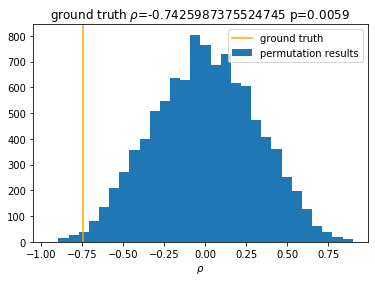

In [11]:
rho_ECOGSTN, p_val_ECOGSTN = icn_permutation_test.permutationTestSpearmansRho(df_comp[df_comp["loc"]=="ECOG+STN"][r"$R^2$"], 
                                            df_comp[df_comp["loc"]=="ECOG+STN"]["UPDRS_total"], True,r"$\rho$", 10000)

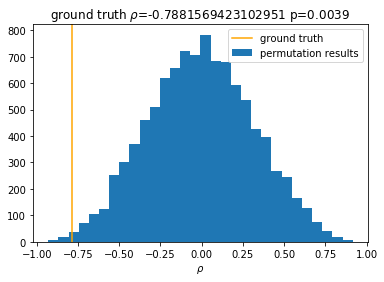

In [12]:
rho_ECOG, p_val_ECOG = icn_permutation_test.permutationTestSpearmansRho(df_comp[df_comp["loc"]=="ECOG"][r"$R^2$"], 
                                            df_comp[df_comp["loc"]=="ECOG"]["UPDRS_total"], True,r"$\rho$", 10000)

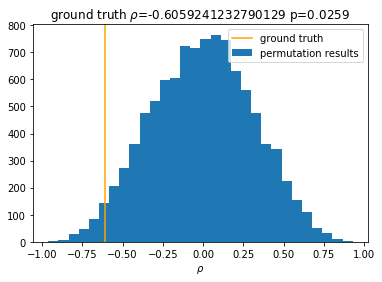

In [13]:
rho_STN, p_val_STN = icn_permutation_test.permutationTestSpearmansRho(df_comp[df_comp["loc"]=="STN"][r"$R^2$"], 
                                            df_comp[df_comp["loc"]=="STN"]["UPDRS_total"], True,r"$\rho$", 10000)

C:\Users\ICN_admin\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


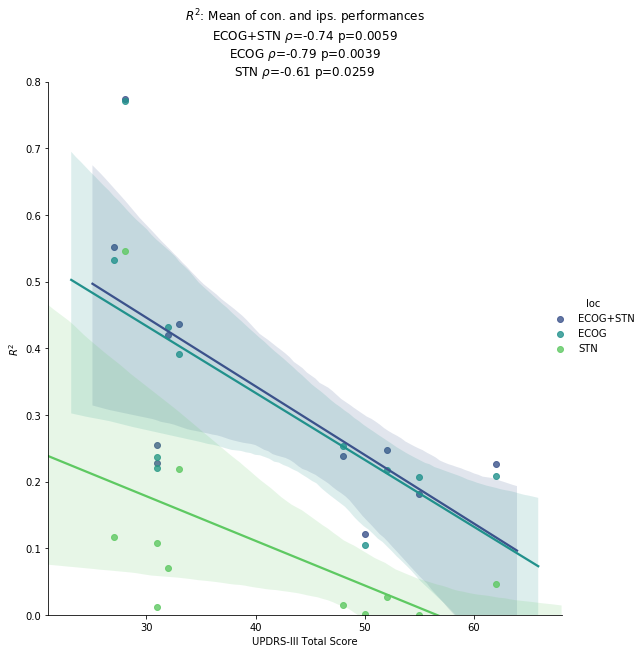

In [26]:
#fig, ax_ = plt.subplots(figsize=(6,4), dpi=200)
#fig, ax = pyplot.subplots(figsize=a4_dims)
ax = sb.lmplot(x="UPDRS_total", y=r"$R^2$", hue="loc", data=df_comp, hue_order=["ECOG+STN", "ECOG", "STN"], 
            palette="viridis", size=10, height=10, legend=True)
plt.ylabel(r"$R^2$")
plt.title(r"$R^2$"+": Mean of con. and ips. performances\n"+
         "ECOG+STN "+ r"$\rho$"+"="+str(np.round(rho_ECOGSTN,2))+" p="+str(p_val_ECOGSTN)+
         "\nECOG "+ r"$\rho$"+"="+str(np.round(rho_ECOG,2))+" p="+str(p_val_ECOG)+
         "\nSTN "+ r"$\rho$"+"="+str(np.round(rho_STN,2))+" p="+str(p_val_STN))
plt.xlabel("UPDRS-III Total Score")
plt.ylim(0, 0.8)
ax.fig.set_figheight(8)
ax.fig.set_figwidth(9)
plt.savefig('our_plot_name.jpg', format='png', dpi=300, bbox_inches='tight')

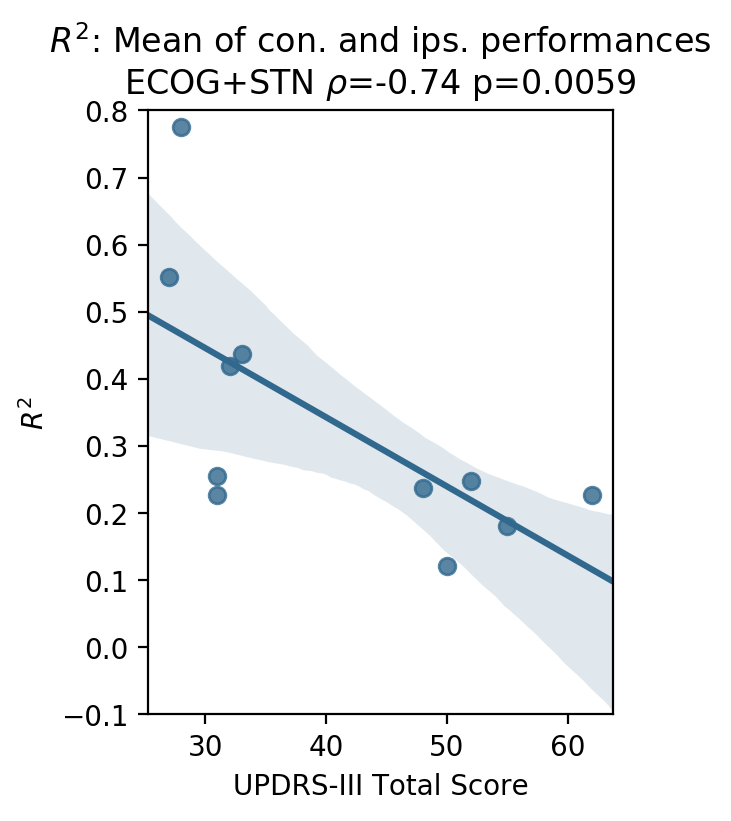

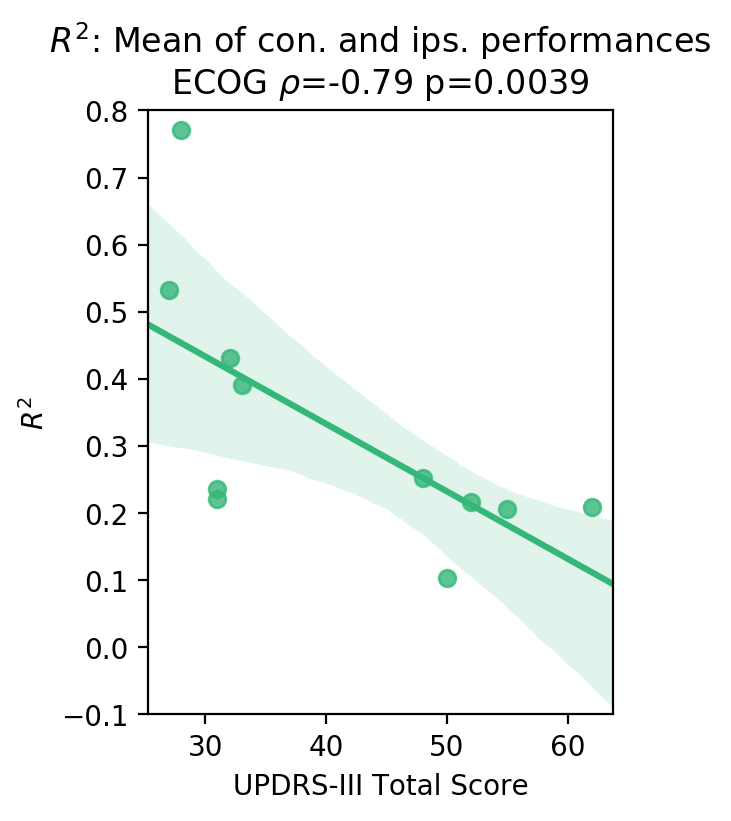

(-0.1, 0.8)

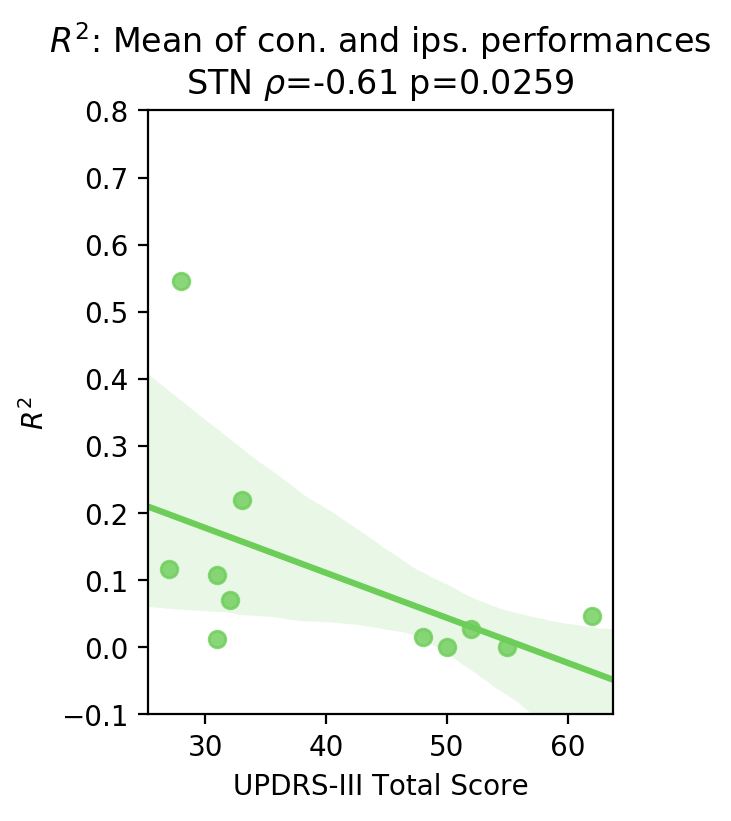

In [44]:
fig, ax_ = plt.subplots(figsize=(3,4), dpi=200)
#fig, ax = pyplot.subplots(figsize=a4_dims)
sb.regplot(x="UPDRS_total", y=r"$R^2$", data=df_comp[df_comp["loc"]=="ECOG+STN"], color=(49/255,104/255,142/255))
plt.ylabel(r"$R^2$")
plt.title(r"$R^2$"+": Mean of con. and ips. performances"+
         "\nECOG+STN "+ r"$\rho$"+"="+str(np.round(rho_ECOGSTN,2))+" p="+str(p_val_ECOGSTN))
         #"\nECOG "+ r"$\rho$"+"="+str(np.round(rho_ECOG,2))+" p="+str(p_val_ECOG)+
         #"\nSTN "+ r"$\rho$"+"="+str(np.round(rho_STN,2))+" p="+str(p_val_STN))
plt.xlabel("UPDRS-III Total Score")
plt.ylim(-0.1, 0.8)
plt.show()
fig, ax_ = plt.subplots(figsize=(3,4), dpi=200)
#fig, ax = pyplot.subplots(figsize=a4_dims)
sb.regplot(x="UPDRS_total", y=r"$R^2$", data=df_comp[df_comp["loc"]=="ECOG"], color=(53/255,183/255,121/255))
plt.ylabel(r"$R^2$")
plt.title(r"$R^2$"+": Mean of con. and ips. performances"+
         #"ECOG+STN "+ r"$\rho$"+"="+str(np.round(rho_ECOGSTN,2))+" p="+str(p_val_ECOGSTN)+
         "\nECOG "+ r"$\rho$"+"="+str(np.round(rho_ECOG,2))+" p="+str(p_val_ECOG))
         #"\nSTN "+ r"$\rho$"+"="+str(np.round(rho_STN,2))+" p="+str(p_val_STN))
plt.xlabel("UPDRS-III Total Score")
plt.ylim(-0.1, 0.8)
plt.show()
fig, ax_ = plt.subplots(figsize=(3,4), dpi=200)
#fig, ax = pyplot.subplots(figsize=a4_dims)
sb.regplot(x="UPDRS_total", y=r"$R^2$", data=df_comp[df_comp["loc"]=="STN"], color=(109/255,205/255,89/255))
plt.ylabel(r"$R^2$")
plt.title(r"$R^2$"+": Mean of con. and ips. performances"+
         #"ECOG+STN "+ r"$\rho$"+"="+str(np.round(rho_ECOGSTN,2))+" p="+str(p_val_ECOGSTN)+
         #"\nECOG "+ r"$\rho$"+"="+str(np.round(rho_ECOG,2))+" p="+str(p_val_ECOG)+
         "\nSTN "+ r"$\rho$"+"="+str(np.round(rho_STN,2))+" p="+str(p_val_STN))
plt.xlabel("UPDRS-III Total Score")
plt.ylim(-0.1, 0.8)